### <주택가격 예측하기>

- 독립 변수 : 면적, 층수, 역까지_도보시간, 주변_편의시설_점수

- 종속 변수 : 주택_가격

- 분석 방법 : 지도학습 기반의 회귀 분석

- 사용할 모델 : 회귀모델 전체 사용(선형회귀, 앙상블모델, xgboost)

### <분석 순서>

1. 데이터 수집
2. 데이터 전처리(확인 후 이상 없으면 바로 진행)
3. 데이터 특성 간의 상관관계 확인
4. 특성들의 유의미성(p-value) 검증(또는 상관관계 검증)
5. 훈련하기
6. 훈련 시 사용된 특성들 중 중요하게 사용된 특성들 확인 -> 특성 중요도라고 한다.
7. 하이퍼 파라미터 튜닝
8. 전체 모델로 확인

# 1. 데이터 수집

In [1]:
### 데이터 읽어들이기
# - 사용할 데이터셋 파일 : 02_회귀_주택가격예측_데이터셋_Row_1000.csv
# - 변수명 : df_org

import numpy as np
import pandas as pd

df_org = pd.read_csv('./data/02_회귀_주택가격예측_데이터셋_Row_1000.csv')
df_org

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
0,121.146284,13,35.025575,9.100563,16601.167450
1,69.040391,27,21.442580,2.792623,11420.654974
2,153.858939,8,10.174919,2.803478,23286.484864
3,71.656510,20,48.844439,1.983254,7535.429045
4,177.556747,4,2.466979,4.395939,29848.361648
...,...,...,...,...,...
995,109.964997,7,47.173178,7.412281,12116.676007
996,37.051580,19,38.339751,7.545630,6035.386052
997,69.009828,27,1.159038,3.559802,12017.803413
998,132.588140,23,15.994720,1.331994,20958.547577


In [2]:
# 데이터프레임 정보 확인하기
# - 결측치를 확인
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   면적          1000 non-null   float64
 1   층수          1000 non-null   int64  
 2   역까지_도보시간    1000 non-null   float64
 3   주변_편의시설_점수  1000 non-null   float64
 4   주택_가격       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [3]:
### 기초통계 확인하기
# - 이상치 확인
df_org.describe()

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.258806,15.300000,28.935722,5.663576,18486.887415
std,49.173936,8.695379,17.148260,2.583594,10427.177312
min,36.276450,1.000000,1.034263,1.011372,1312.073187
25%,75.918038,8.000000,14.529759,3.446698,9587.864073
50%,118.338542,15.000000,27.478162,5.717975,16434.524871
75%,159.802495,23.000000,42.964969,7.935390,26276.908661
max,203.987011,30.000000,59.983704,9.994926,44167.392672


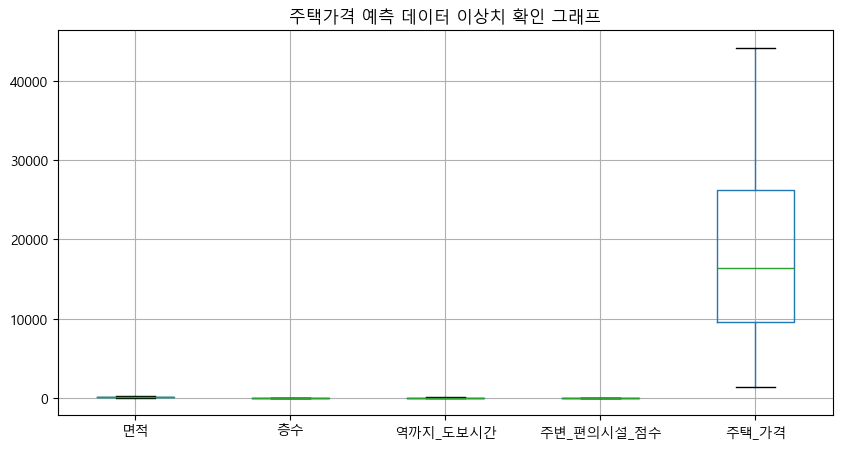

In [4]:
### 이상치 확인을 위한 박스플롯(boxplot) 그래프 그리기
# - 그래프 전체 제목 : 주택가격 예측 데이터 이상치 확인 그래프
# - 한글 깨짐 처리

import matplotlib.pyplot as plt

### 시각화 시 한글 및 마이너스(-) 기호 사용을 위한 처리
# - 한글 처리 : 폰트 지정
plt.rcParams['font.family'] ='Malgun Gothic'

# - 마이너스(-) 기호 처리
plt.rcParams['axes.unicode_minus'] =False

### 그래프 전체 크기 지정하기
# - figsize = (너비, 높이) 설정
# - 너비 * 100, 높이 * 100한 값이 실제 사용됨(픽셀 단위)
plt.figure(figsize=(10,5))
plt.title('주택가격 예측 데이터 이상치 확인 그래프')

### 박스플롯 그리기
# - 데이터프레임 자체적으로 Matplotlib 시각화를 이용하여 boxplot을 그려주는 함수
df_org.boxplot()

plt.show()

In [5]:
### 전체 특성에 대한 행단위 중복체크

df_org[df_org.duplicated() == True]

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격


#### 특성들간의 관계 확인하기

- 상관관계 분석 : 선형성을 띄는지 확인하는 분석

- 상관관계는 표와 시각화로 나타내면 된다.

### <상관관계 확인하는 방법>

1. 왼쪽 상단 - 오른쪽 하단으로 중앙 대각선을 마음 속으로 그린다.

2. 중앙 대각선을 중심으로 오른편 또는 왼편 한쪽만 보면 된다(서로 대칭되어 있다).



In [6]:
### 상관관계 표 나타내기
# - 사용되는 함수 : corr()
# 표에 보이는 값 -> '상관관계 계수'라고 칭한다.

correlation_matrix=df_org.corr()
correlation_matrix

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
면적,1.000000,0.058629,-0.025361,0.050418,0.963063
층수,0.058629,1.000000,-0.029001,-0.013287,0.229850
역까지_도보시간,-0.025361,-0.029001,1.000000,-0.003508,-0.117005
주변_편의시설_점수,0.050418,-0.013287,-0.003508,1.000000,0.091508
주택_가격,0.963063,0.229850,-0.117005,0.091508,1.000000


### <상관관계 계수>

- 특성들 간에 선형적인 특성이 있는지에 대한 관계성을 나타낸 지표값

- 지표값을 줄여서 '상관계수(상관관계)'라고 칭한다.

- 상관계수 해석 방법

    - 상관계수 값은 '절대값'으로 해석한다.
 
    - 음수값이 있는 상관계수를 '음의 상관관계'라고 칭한다.
 
    - 양수값이 있는 상관계수를 '양의 상관관계'라고 칭한다.
 
    - 상관 계수 값의 범위 : 0 ~ 1(양의 상관관계인 경우) 또는 -1 ~ 0(음의 상관관계인 경우)
 
        - 양의 상관관계 : 양수값(0 ~ 1)으로, 우상향의 선형 관계가 있다고 해석함
     
        - 음의 상관관계 : 음수값(-1 ~ 0)으로, 우하향의 선형 관계가 있다고 해석함
     
    - 해석시에는 절대값으로 해석한다.
 
    - 상관계수의 절대값이 클수록 선형 형태를 잘 나타낸다(관계성이 크다고 표현).
 
    - 선형 형태를 '선형성'이라고 칭하기도 한다(선형성이 좋다, 나쁘다 등으로 표현하기도 함, 또는 선형성이 크다/작다).

### 해석

- 종속 변수를 기준으로 독립변수 각각과 비교하여 해석한다.

    -> 종속 변수를 y축, 각 독립변수를 x축이라고 생각하고 해석하면 된다.
    
- 주택 가격과 면적과의 관계

    - 면적이 커질수록 주택 가격도 커지는 관계성을 띄고 있음 (우상향 선형)
 
- 주택가격과 층수와의 관계
 
    - 층수가 높아질수록 주택가격이 높아지는 관계성을 띄고 있음(우상향 선형)
     
    - 다만, 상관계수의 값이 0.22로 다소 작은 영향을 미치고 있음
     
- 주택 가격과 역까지_도보시간과의 관계

    -  역까지 도보시간, 즉 역까지의 거리가 멀수록 주택가격이 낮아지는 현상을 보이고 있음(우하향 선형)
    
    -  다만, 상관계수의 값이 0.11로 매우 작은 영향을 미치고 있음
 
- 주택 가격과 주변_편의시설_점수와의 관계

    - 주변 편의시설의 점수가 클수록 주택가격이 높아지는 현상을 보이고 있음(우상향 선형)
    
    - 주변 편의시설은 주택가격에 매우 낮은 영향을 미치고 있음

#### 상관계수의 값이 클수록 훈련 모델의 성능에 영향을 많이 미칠수 있는 특성이라고 보면 된다.

    -> 보통 훈련시에는 전체 특성을 사용하여 훈련 -> 이후 상관계수가 매우 적은 특성은 제외하면서 성능 테스트 가능

    - 상관계수 0.01 이하의 특성들의 경우, 훈련에 영향을 미치지 않는 경우도 있으며, 미미하게 영향을 미치는 경우도 있다.

#### 훈련의 독립변수에서 특성을 제외하고자 할 경우에는 특성 중요도 확인이 가능한 경우에는 --> 특성 중요도를 포함하여 제외할지 결정해야함

#### 특성 제외 방법 : 특성을 제외할 때와 포함할 때의 정확도가 동일한 경우는 제외

#### 상관관계는 인과성을 나타내지 않는다(선형성만 나타낸다).

#### 인과성은 특성 중요도를 통해서 확인 가능하다.

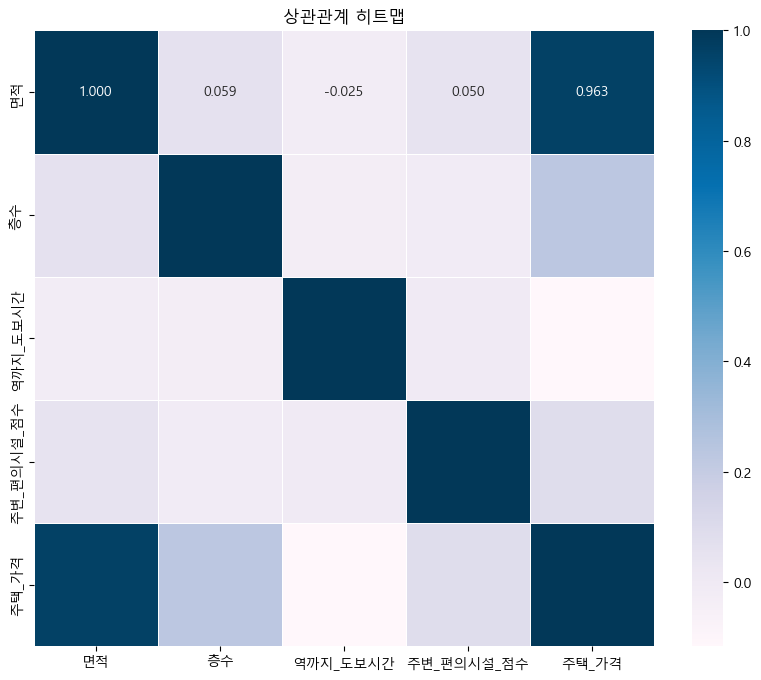

In [7]:
### 상관관계 히트맵 그리기

import seaborn as sns

plt.figure(figsize=(10,8))

### 그래프 제목
plt.title('상관관계 히트맵')

### 히트맵 그래프 그리기
# - annot : 히트맵 사각형 박스에 표시할 값을 보여줄지 말지(True or False) 결정
# - fmt : 히트맵 사각형 박스에 표시할 값의 표현 단위 정의(f는 float타입으로 .3은 표시할 소숫점 자리수)
# - linewidths : 각 사각형 간의 경계선의 두께 (보통 0.5~0.9 사잇값 사용)
# - cmap : color map으로 색상지도를 의미

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', linewidths=0.5, cmap='PuBu')
plt.show();

### <산점행렬도> 그리기

- 특성들간의 상관관계를 산점도로 시각화한 그래프를 -> 산점행렬도라고 한다.

- 특성들간의 선형관계를 산점도로 표현한 그래프이다.

- 산점행렬도 그래프 함수 : `pairplot()` -> 여러개의 특성들 즉, 작은 산점도 그래프를 하나의 그래프로 그려주는 함수

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

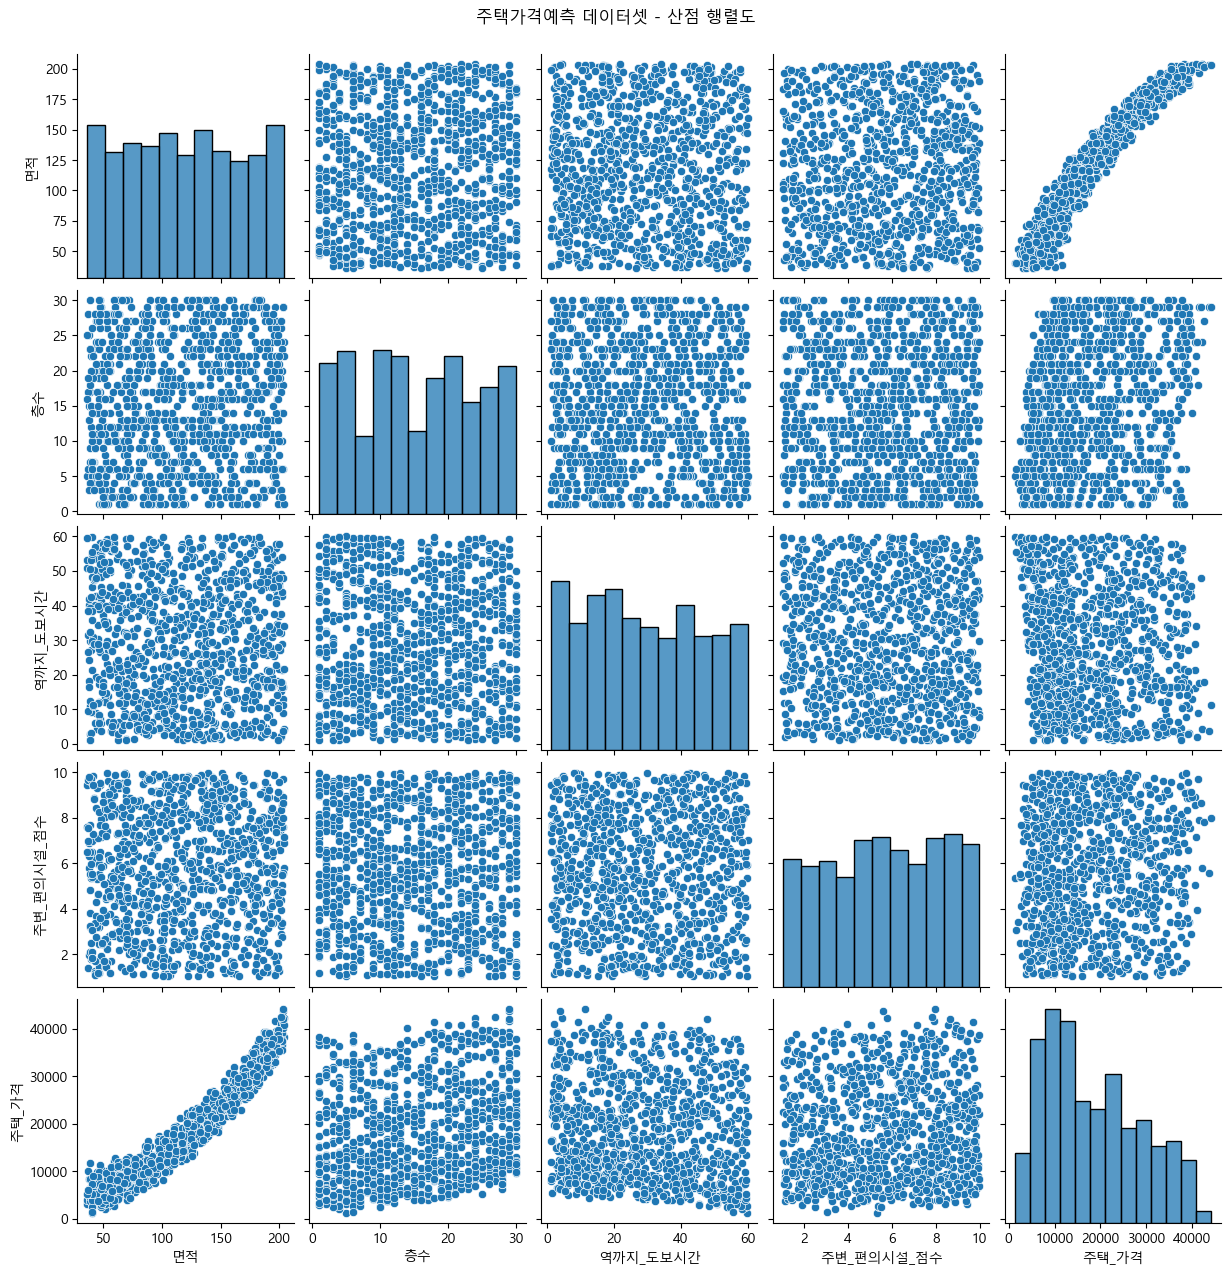

In [8]:
sns.pairplot(df_org)
# y=1.02 : 제목의 y축 위치
plt.suptitle('주택가격예측 데이터셋 - 산점 행렬도', y=1.02)
plt.show();

#### 해석

- 주택가격을 기준으로 면적, 층수, 시간, 점수 각각의 특성간의 선형관계를 확인했을 때

- 주택가격과 면적간의 관계는 매우 높은 선형성을 띄고 있으며, 층수, 시간은 다소 작은 선형성을 보인다.

- 점수의 경우에는 매우 적은 선형성을 띄고 있는 것으로 분석된다.

- 모든 특성들이 선형성을 보이고 있기에 회귀모델에 적용하여 훈련 가능한 데이터로 여겨진다.

In [9]:
df_org

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
0,121.146284,13,35.025575,9.100563,16601.167450
1,69.040391,27,21.442580,2.792623,11420.654974
2,153.858939,8,10.174919,2.803478,23286.484864
3,71.656510,20,48.844439,1.983254,7535.429045
4,177.556747,4,2.466979,4.395939,29848.361648
...,...,...,...,...,...
995,109.964997,7,47.173178,7.412281,12116.676007
996,37.051580,19,38.339751,7.545630,6035.386052
997,69.009828,27,1.159038,3.559802,12017.803413
998,132.588140,23,15.994720,1.331994,20958.547577


# 2. 데이터 검정

In [10]:
### 훈련에 사용할 독립 변수와 종속 변수로 데이터 분리하기
# - 독립 변수 : X (대문자)
# - 종속 변수 : y (소문자)


### 데이터프레임에서 주택 가격을 제외한 행렬 데이터를 모두 조회
# - 독립변수 추룰하기
X = df_org.iloc[:,:-1]
X

y = df_org['주택_가격']
y

len(X), len(y)

(1000, 1000)

### 독립 변수와 종속 변수 데이터를 이용하여 -> 상관관계 검정하기

- 독립 변수들의 특성과 종속 변수간에 유의미성이 있는지 확인하는 절차로 통계적 기법을 사용한다.

- 독립 변수와 종속 변수의 관계가 유의미(p-value)한지 검정하는 관계

  - p-value값 : 유의미 계수라고 칭한다.

- 유의미한 경우의 기준 : p-value < 0.05인 경우를 의미함(이렇게 작성해야 한다).

- 유의미하지 않은 경우 : p-value >= 0.05인 경우를 의미함

- 유의미한 기준값 0.05는 정해진 값이 아니다(통계학에서 보편적으로 0.05를 기준으로 하기 때문에 분석에서도 보편적으로 사용함).

### <검정을 하는 이유>

- 상관계수의 값이 높더라도(선형적이더라도), p-value < 0.05의 조건을 만족하지 않는 경우, 즉 유의미하지 않은 경우에는  해당 특성과의 선형적 특성으로 사용하기에는 어려움이 있는 데이터로 판단한다.

    - 즉, 훈련에 적합하지 않은 데이터(회귀모델에 적용하기 어려운 데이터로 판단한다).
 
- 내가 사용하는 데이터로 연구(분석)를 수행할 수 있을지 없을지를 판단하는 기준값이 된다.

- p-value < 0.05 : 유의미함 (연구(분석) 가능) / p-value >= 0.05 유의미하지 않음(연구 불가)

- 통계학적으로 사용되는 용어

    - 연구를 할 수 있는 경우 : 귀무가설 기각, 대립가설 채택
 
    - 연구를 할 수 없는 경우 : 귀무가설 채택
 
        --> 귀무 가설/대립가설은 사전에 정답을 놓고 이에 반대되는 논쟁을 할 때 사용한다.

        --> 기존의 연구결과는 귀무가설, 이에 반대되는 가설은 대립가설이라고 한다(보통 연구는 새로운 연구, 기존 연구보다 향상된 연구 등을 수행한다).

        --> p-value < 0.05인 경우는 --> 귀무가설을 기각하고 대립가설을 채택하여 연구(분석)이 가능해짐

        --> p-valeu >= 0.05인 경우는 --> 귀무가설을 채택(기존 연구에서 벗어날 수 없다는 의미)

### <상관관계 검정 방법>

- 스피어만(Spearman) 상관관계 검정

    - 특성 간의 '비선형적'인 관계도 포함하여 검정에 유용하게 사용된는 검정
 
    - 특성 간의 선형관계의 방향이 변하지 않고, 일관되게 증가하거나 감소 또는 수평적 관계(선형이 아닌)의 데이터를 검정할 때 주로 사용됨
    
    - 보통 순위 형태의 데이터 특성 관계가 보일 때 사용
 
        --> 예시 : 시험 성적과 학업 성취도 간의 관계(시험 성적이 높을수록, 학업 성취도가 높을까?)

- 피어슨(Pearson) 상관관계 검정

    - 특성 간의 '선형적'인 관계를 파악하는데 주로 사용됨
 
    - 일반적으로 주로 사용되는 검정 방법임
 
    - 보통 관계를 수치적으로 파악하고자 할 때 사용됨(관계)
 
        --> 예시 : 온도와 아이스크림 판매량 간의 관계(날씨가 더우면, 아이스크림 판매량이 증가할까?)

In [11]:
### 스피어만 (Spearman) 상관관계 검정
# - 사용 패키지 : scipy.stats
# - 사용 라이브러리 함수 : spearmanr

from scipy.stats import spearmanr

##### spearmanr함수

- 첫 번째 값(statistic) : 상관계수 값(corr)

- 두 번째 값(p-value) : p-value(유의미 계수 값) (p-value 계수라고 칭한다)

- 비교할 특성들은 1차원으로 넣어줘야 한다.

In [12]:
### 각 특성간의 상관관계 검정하기
# - 각각의 특성과 종속변수와의 관계 확인
corr_v, p_value = spearmanr(X['면적'],y)

#### .4f : 소숫점 4자리까지 표현하라는 포멧 속성
print(f'면적 vs 주택 가격 : corr={corr_v:.4f} / p-value={p_value:.4f}')

면적 vs 주택 가격 : corr=0.9704 / p-value=0.0000


In [13]:
### 독립 변수의 컬럼명을 리스트로 추출하기(반복하기 위해서)
X.columns.to_list()

['면적', '층수', '역까지_도보시간', '주변_편의시설_점수']

In [14]:
for column in X.columns:
    corr_v, p_value = spearmanr(X[column],y)
    print(f'{column} vs 주택 가격 : corr={corr_v:.4f} / p-value={p_value:.4f}')

면적 vs 주택 가격 : corr=0.9704 / p-value=0.0000
층수 vs 주택 가격 : corr=0.2382 / p-value=0.0000
역까지_도보시간 vs 주택 가격 : corr=-0.1308 / p-value=0.0000
주변_편의시설_점수 vs 주택 가격 : corr=0.0914 / p-value=0.0038


### 해석

- 검정 결과의 값에서 p-value의 값이 0.00으로 p-value < 0.05로 면적과 주택 가격간에는 유의미함을 나타냄

- 훈련 데이터로 사용 가능

In [15]:
### 피어슨 상관관계 검정하기
from scipy.stats import pearsonr

In [16]:
for column in X.columns:
    corr_v, p_value = pearsonr(X[column],y)
    print(f'{column} vs 주택 가격 : corr={corr_v:.4f} / p-value={p_value:.4f}')

면적 vs 주택 가격 : corr=0.9631 / p-value=0.0000
층수 vs 주택 가격 : corr=0.2299 / p-value=0.0000
역까지_도보시간 vs 주택 가격 : corr=-0.1170 / p-value=0.0002
주변_편의시설_점수 vs 주택 가격 : corr=0.0915 / p-value=0.0038


#### 해석

- 주택 가격 예측을 위해 사용하고자하는 독립 변수의 특성들은 모두 p-value < 0.05의 유의미한 결과를 나타냄

- 따라서, 모든 독립 변수 특성들을 이용하여, 주택가격을 예측하는 훈련에 사용할 수 있음(연구 진행 --->>>)

# 3. 데이터 분류

### 독립 변수와 종속변수 데이터를  훈련 : 검증 : 테스트 데이터로 분리하기

- 훈련에 사용할 데이터 분리 작업

- 훈련 데이터 : 모델 훈련 및  정확도 확인 시 사용

- 검증 데이터 : 검증 정확도(기존 테스트 정확도) 확인 시 사용

- 테스트 데이터 : 예측 시 사용

- 분류 비율 = 6 : 2 : 2 를 주로 사용하고 있다.

- 분류 순서 -> 6(훈련 데이터) : 4(검증+테스트 데이터) 분류 -> 뒤에 4를 5(검증):5(테스트)로 분류

- 사용할 변수명 : `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, `y_test`

- 분류 시 사용할 함수 : `train_test_split()` -> 2개로만 분류한다.

In [17]:
### 라이브러리 import
from sklearn.model_selection import train_test_split

### 6(훈련 데이터) : 4(검증+테스트 데이터) 분류
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4, random_state=42)
X_train.shape, y_train.shape, X_temp.shape, y_temp.shape

((600, 4), (600,), (400, 4), (400,))

In [18]:
### 4(검증+테스트 데이터)를 5(검증) : 5(테스트)로 분류 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_val.shape, y_val.shape, X_test.shape, y_test.shape

((200, 4), (200,), (200, 4), (200,))

# 4. 데이터 전처리

In [19]:
X

,면적,층수,역까지_도보시간,주변_편의시설_점수
0,121.146284,13,35.025575,9.100563
1,69.040391,27,21.442580,2.792623
2,153.858939,8,10.174919,2.803478
3,71.656510,20,48.844439,1.983254
4,177.556747,4,2.466979,4.395939
...,...,...,...,...
995,109.964997,7,47.173178,7.412281
996,37.051580,19,38.339751,7.545630
997,69.009828,27,1.159038,3.559802
998,132.588140,23,15.994720,1.331994


In [20]:
### 데이터의 scale 확인
# - 데이터 특성 간의 편차가 있는 경우에는 사전에 정규화(표준화)를 진행해도 된다.

### 라이브러리 import
from sklearn.preprocessing import StandardScaler

In [21]:
### 정규화 하기
# - 정규화는 독립 변수에 대해서만 처리한다.,
# - 사용할 변수명 : X_train_scaled, X_val_scaled, X_test_scaled

# 클래스(변환기) 생성하기
scaler = StandardScaler()

# 정규화 패턴 찾기 -> 훈련 독립 변수 하나만 사용
scaler.fit(X_train)

# 훈련/검증/테스트 독립 변수 정규화 패턴으로 변환하기 
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape

((600, 4), (200, 4), (200, 4))

# 5. 모델 훈련

In [22]:
### 사용할 모델 라이브러리 정의하기

# - 선형 회귀 모델 : 선형 방정식을 이용한 방식
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# - 앙상블 모델 : 트리 분류 구조를 이용한 방식 / 여러 개의 트리를 사용하는 모델
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

### 설치해야 사용 가능한 라이브러리 pip install xgboost
import xgboost as xgb

### 평가 라이브러리 : 회귀 분석인 경우에 사용하는 평가 방법(분류는 다른 평가방법을 사용한다).
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 앙상블 모델 : 트리 분류 구조를 이용한 방식 / 여러 개의 트리를 사용하는 모델
- RandomForest : 여러 개의 트리로 훈련 후 가장 성능이 좋은 트리를 사용하는 방식

- 나머지 : 여러 개의 트리로 훈련을 하지만, 트리와 트리는 훈련의 성능을 전달하면서 성능을 계속 높여나가는 구조를 가짐

### 평가 라이브러리 : 회귀 분석인 경우에 사용하는 평가 방법(분류는 다른 평가방법을 사용한다).

- 모델을 선택할 때 가장 비중을 많이 두는 평가는 R2(결정계수, 설명력, 예측력) 값이다.

- 평균절대오차(MAE) : 실제값과 예측값 간의 차이를 절대값을 취하여 평균한 값 

- 평균제곱오차(MSE) : 실제값과 예측값 간의 차이를 제곱하여 평균한 값

- 결정계수(R2) -> 설명력 = 예측력(훈련결과의 데이터를 잘 설명하고 있는지 여부 확인) : 설명계수라고 칭한다
    
    - 모델의 설명력이 좋은지 나쁜지를 나타내는 지표(예측을 잘 할 수 있는지 없는지를 결정한다).
    
    - 값의 범위는 0~1 : 1에 가까울수록 설명력이 좋다고 표현함 (분석 보고서에 항상 들어가는 내용이다).

- 평가시에는 MSE와 R2 평가 결과가 주로 사용된다(우선순위는 R2>MSE>MAE이다)

- 모델 선정 시 해석 방법 : 결정계수값을 이용해서 해석한다.

    - "해당 모델의 결정계수는 0.xxx로 데이터를 잘 설명하고 있음, 즉 설명력이 좋은 모델로 예측 모델로 선정하였음"

In [23]:
### 훈련 시키기, 정확도 확인, 예측, 평가를 하나의 함수로 정의해 놓기(기능 정의)
# - 함수 이름 : train_and_evaluate_model

def train_and_evaluate_model(model, train_input, train_target, val_input, val_target) : 
    ### 모델 훈련시키기
    model.fit(train_input, train_target)

    ### 훈련 및 검증 독립변수로 정확도 확인하기
    train_score = model.score(train_input, train_target)
    val_score = model.score(val_input, val_target)

    ### 훈련 및 검증 데이터를 이용해서 예측 및 평가하기
    # - 훈련 예측 및 평가
    train_pred = model.predict(train_input)
    train_mae = mean_absolute_error(train_target, train_pred)
    train_mse = mean_squared_error(train_target, train_pred)
    train_r2 = r2_score(train_target, train_pred)

    # - 검증 예측 및 평가
    val_pred = model.predict(val_input)
    val_mae = mean_absolute_error(val_target, val_pred)
    val_mse = mean_squared_error(val_target, val_pred)
    val_r2 = r2_score(val_target, val_pred)    

    # print('----------------------[종료]---------------------------')
    
    return model, train_score, train_mae, train_mse, train_r2, val_score, val_mae, val_mse, val_r2

In [24]:
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()
hgb_reg = HistGradientBoostingRegressor()
xgb_reg = xgb.XGBRegressor()

### 리스트에 담아서 반복 수행 할 수 있도록 처리
models = [linear_reg, ridge_reg, lasso_reg, rf_reg, gb_reg, hgb_reg, xgb_reg]
models

[LinearRegression(),
 Ridge(),
 Lasso(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 HistGradientBoostingRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)]

In [25]:
### 함수 반복 호출

results = dict()

for m in models:
    ### 모델은 클래스로 되었기 때문에 -> 클래스 이름을 추출할 수 있다.
    model_name = m.__class__.__name__
    print(f'----------[{model_name}]------------')
    ### 함수 호출하기
    results[model_name] = train_and_evaluate_model(m, X_train_scaled, y_train, X_val_scaled, y_val)
    print()

results

----------[LinearRegression]------------

----------[Ridge]------------

----------[Lasso]------------

----------[RandomForestRegressor]------------

----------[GradientBoostingRegressor]------------

----------[HistGradientBoostingRegressor]------------

----------[XGBRegressor]------------



{'LinearRegression': (LinearRegression(),
  0.9669915339286245,
  1612.6160152570244,
  3589679.6378047974,
  0.9669915339286245,
  0.9692631447669035,
  1598.347095796926,
  3464239.741108231,
  0.9692631447669035),
 'Ridge': (Ridge(),
  0.9669889579627101,
  1612.8486746871984,
  3589959.7747966424,
  0.9669889579627101,
  0.9692066949864149,
  1598.4065505565477,
  3470601.991620272,
  0.9692066949864149),
 'Lasso': (Lasso(),
  0.9669914980638333,
  1612.6148201286805,
  3589683.538110561,
  0.9669914980638333,
  0.9692590179241283,
  1598.392930411959,
  3464704.862625654,
  0.9692590179241283),
 'RandomForestRegressor': (RandomForestRegressor(),
  0.9991434775433417,
  233.15126012245145,
  93147.0494672706,
  0.9991434775433417,
  0.9938558460872574,
  661.9880863124624,
  692485.3567026536,
  0.9938558460872574),
 'GradientBoostingRegressor': (GradientBoostingRegressor(),
  0.9993166135485079,
  208.9759867603703,
  74318.46194756604,
  0.9993166135485079,
  0.9969872804343567,


In [26]:
### 정확도 및 평가 결과 확인하기
for m_name,(_,train_score, train_mae, train_mse, train_r2, val_score, val_mae, val_mse, val_r2) in results.items():
    print(f'model_name = {m_name}')
    print(f'Train_Score = {train_score:.4f} / Val_Score = {val_score:.4f} / Train - Val = {train_score - val_score}')
    print(f'Train_MAE = {train_mae:.4f} / Val_MAE = {val_mae:.4f}' )
    print(f'Train_MSE = {train_mse:.4f} / Val_MSE = {val_mse:.4f}')
    print(f'Train_R2 = {train_r2:.4f} / Val_R2 = {val_r2:.4f}')
    print()

model_name = LinearRegression
Train_Score = 0.9670 / Val_Score = 0.9693 / Train - Val = -0.0022716108382789812
Train_MAE = 1612.6160 / Val_MAE = 1598.3471
Train_MSE = 3589679.6378 / Val_MSE = 3464239.7411
Train_R2 = 0.9670 / Val_R2 = 0.9693

model_name = Ridge
Train_Score = 0.9670 / Val_Score = 0.9692 / Train - Val = -0.0022177370237047578
Train_MAE = 1612.8487 / Val_MAE = 1598.4066
Train_MSE = 3589959.7748 / Val_MSE = 3470601.9916
Train_R2 = 0.9670 / Val_R2 = 0.9692

model_name = Lasso
Train_Score = 0.9670 / Val_Score = 0.9693 / Train - Val = -0.002267519860294942
Train_MAE = 1612.6148 / Val_MAE = 1598.3929
Train_MSE = 3589683.5381 / Val_MSE = 3464704.8626
Train_R2 = 0.9670 / Val_R2 = 0.9693

model_name = RandomForestRegressor
Train_Score = 0.9991 / Val_Score = 0.9939 / Train - Val = 0.005287631456084241
Train_MAE = 233.1513 / Val_MAE = 661.9881
Train_MSE = 93147.0495 / Val_MSE = 692485.3567
Train_R2 = 0.9991 / Val_R2 = 0.9939

model_name = GradientBoostingRegressor
Train_Score = 0.99

#### 해석

- 7개의 모델 중에 가장 일반화된 모델은 GB 모델이며, 그 다음으로 HGB, XGB, RF 순으로 나타났음

- 또한, 결정계수, 즉 설명력이 가장 좋은 모델 또한 GB모델로 확인되었으며, MSE(평균절대오차) 역시 GB 모델이 가장 작은 오차를 나타내고 있음

- 따라서 설명력이 가장 좋은 GB 모델을 주택가격 예측 모델로 선정하는 것이 가장 타당함

In [27]:
### 선정된 GB 모델을 이용하여 최종 테스트하기
gb_model = results['GradientBoostingRegressor'][0]
gb_model

# - 테스트 정확도 확인하기
gb_score = gb_model.score(X_test_scaled, y_test)

# - 테스트 데이터로 예측하기
pred = gb_model.predict(X_test_scaled)

# - 평균 절대 오차(MAE)
gb_mae = mean_absolute_error(y_test,pred)

# - 평균 제곱 오차(MSE)
gb_mse = mean_squared_error(y_test, pred)

# - 결정 계수(R2)
gb_r2 = r2_score(y_test, pred)

"""
model_name = GradientBoostingRegressor
Train_Score = 0.9993 / Val_Score = 0.9970 / Train - Val = 0.0023336932407151956
Train_MAE = 208.9760 / Val_MAE = 477.0446
Train_MSE = 74318.4619 / Val_MSE = 340044.1357
Train_R2 = 0.9993 / Val_R2 = 0.9970
(0.9966962155780684, 451.4350848484129, 339164.09485785646, 0.9966962155780684)
"""

gb_score, gb_mae, gb_mse, gb_r2

(0.9966962155780684, 451.4350848484129, 339164.09485785646, 0.9966962155780684)

#### <최종 테스트 결과 확인 방법>

1. 과적합 여부 확인

    - 훈련 결정계수 -> 검증 결정 계수 -> 테스트 결정 계수(간혹, 검증이 테스트보다 작은 경우는 있음, 훈련은 무조건 커야 함)
  
    - 

#### 정확도 X -> 결정계수

- 회귀 분석에서는 정확도 대신에 "결정계수"라는 용어를 사용한다.

    -> 즉, `score()`는 `r2_score()`과 같은 결과를 나타낸다. 즉, 결정계수의 값이다.

- 분류 분석에서는 "정확도"라는 용어를 그대로 사용한다.

#  6. 하이퍼파라미터 튜닝 진행하기

- 위에 7개 모델에 대해서, 조금 더 성능을 향상시켜서 비교해 볼 수 있는 방법 찾기 즉, 하이퍼 파라미터 튜닝 진행

- 하이퍼 파라미터 튜닝 클래스 사용

- 패키지 : sklearn.model_selection

- 튜닝 클래스 : `GridSearchCV()`

#### `GridSearchCV()`

- 각 모델의 하이퍼 파라미터 속성들의 최적의 값들을 스스로 찾아서 훈련까지 수행한다.

- 하이퍼 파라미터 속성 및 속성의 값의 범위를 지정하면, 범위 내에서 가장 적절한 값을 찾아내는 방식을 사용한다.

- 즉, 최적의 모델(성능 좋은 모델)을 만들어낸다.

- 최적의 모델로 예측하고 평가만 수행하면 된다.

- 내부적으로 Cross Validation(CV), 즉 데이터를 자체적으로 독립변수와 종속변수로 여러 그룹으로 만들어서 여러번 교차검증을 스스로 진행하면서 정확도를 높이는 훈련을 수행한다.

- cv 작업을 --> fold 작업이라고 한다.

- 시스템 지원을 많이 사용하기 때문에, CPU Core(코어)를 가급적 모두 사용하는 것이 좋다(속도 측면).

![](k-fold.png)

[이미지 출처]https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fv2%2Fresize%3Afit%3A1200%2F1*AAwIlHM8TpAVe4l2FihNUQ.png&tbnid=QWf1cWdTE0fBAM&vet=12ahUKEwiV4-jJopGFAxUPY_UHHeVKDgAQMygCegQIARBX..i&imgrefurl=https%3A%2F%2Ftowardsdatascience.com%2Fcross-validation-k-fold-vs-monte-carlo-e54df2fc179b&docid=3k4xLw1dAJ_joM&w=1200&h=538&q=k-fold%20cross%20validation&ved=2ahUKEwiV4-jJopGFAxUPY_UHHeVKDgAQMygCegQIARBX

In [28]:
### 하이퍼 파라미터 튜닝 클래스 라이브러리
from sklearn.model_selection import GridSearchCV

In [29]:
### 샘플 테스트
rf_reg = RandomForestRegressor()
rf_reg

RandomForestRegressor()

In [31]:
### 하이퍼 파라미터 값의 범위 지정하기
gridParams : {}

# - 랜덤 포레스트에서 훈련에 사용할 트리의 갯수 범위 지정
gridParams['n_estimators'] = [50,100]

# - 랜덤 포레스트에서 훈련 시 트리가 밑으로 뻗어나가는 최대 깊이(None은 제한을 두지 않겠다는 의미)
gridParams['max_depth'] = [None, 3, 10]

gridParams

{'n_estimators': [50, 100], 'max_depth': [None, 3, 10]}

In [42]:
### CV 갯수 지정하기 : 데이터를 몇개의 그룹으로 분류해서 훈련할지 지정(교차 검증 개수) 보통 3 ~ 5를 주로 사용

cv = 5 

### CPU core 갯수 지정하기
# - 보통 -1을 사용한다(-1은 모든 core를 사용한다는 의미이다).
n_jobs = -1

### 평가방법 지정 : 스스로 평가까지 진행시킨다(가장 좋은 성능을 만들기 위해서)
# - neg_mean_squared_error : 평균제곱오차(MSE)를 의미한다
# - r2 : 결정계수 `r2_score()`를 의미한다.
scoring = ['neg_mean_squared_error','r2']

### 모델 선정기준지정 : 최종 모델 선정시 결정 기준을 평가 방법 중에 지정한다.
refit='r2'

In [43]:
### 튜닝 객체 생성하기
grid_search_model = GridSearchCV(rf_reg, gridParams, scoring=scoring, 
                                 refit=refit, cv=cv, n_jobs=n_jobs)
grid_search_model

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 10], 'n_estimators': [50, 100]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

In [44]:
### 튜닝 객체 훈련시키기 (모델 훈련시키기)
grid_search_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 10], 'n_estimators': [50, 100]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

In [47]:
### 최적의 하이퍼 파라미터와 성는 지표, 최적의 모델 추출하기
print(f'1.최적의 하이퍼 파라미터(best_param_) : {grid_search_model.best_params_}')
print(f'2.성능 평가 결과 (best_param_) : {grid_search_model.best_score_}')
print(f'3.최적의 하이퍼 파라미터(best_param_) : {grid_search_model.best_estimator_}')

1.최적의 하이퍼 파라미터(best_param_) : {'max_depth': None, 'n_estimators': 100}
2.성능 평가 결과 (best_param_) : 0.9928803520732954
3.최적의 하이퍼 파라미터(best_param_) : RandomForestRegressor()


In [48]:
### 최적의 모델을 변수로 받아오기
best_model = grid_search_model.best_estimator_
best_model

RandomForestRegressor()

In [50]:
### 테스트 데이터로 예측하기
test_pred = best_model.predict(X_test_scaled)

### 성능 평가하기
mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

mae, mse, r2

(549.6628763237065, 498388.27712031425, 0.9951452189338806)

#### 해석

- 최적의 성능을 가지는 모델을 이용해서 검증 데이터로 예측 및 평가한 결과 최적의 결정계수(r2) 보다 검증 평가결과가 더 높게 나왔기에, 과소 적합이 발생한 것으로 보이며, 해당 모델은 주택 가격 예측 모델로는 부적합한 것으로 여겨진다.

- 따라서, 다른 모델들을 통해 확인할 필요성이 있다.

In [51]:
### 하이퍼 파라미터 튜닝을 위한 함수 생성
# - 함수 이름 : get_HyperParameter_Tuning()
def get_HyperParameter_Tuning(model, gridParams,scoring, refit, 
                              X_train, y_train, X_val, y_val, cv=5, n_jobs=-1):
    ### 튜닝 객체 생성하기
    grid_search_model = GridSearchCV(model, gridParams, scoring=scoring, 
                                 refit=refit, cv=cv, n_jobs=n_jobs)
    ### 튜닝 객체 훈련시키기 (모델 훈련시키기)
    grid_search_model.fit(X_train,y_train)

    ### 최적의 모델을 변수로 받아오기
    best_model = grid_search_model.best_estimator_

    ### 훈련 데이터로 예측 및 평가 결과 확인하기
    # - 예측하기
    train_pred = best_model.predict(X_train)

    # - 훈련 MAE
    train_mae = mean_absolute_error(y_train, train_pred)
    # - 훈련 MSE
    train_mse = mean_squared_error(y_train, train_pred)
    # - 훈 r2
    train_r2 = r2_score(y_train, train_pred)

    ### 검증 데이터로 예측 및 평가 결과 확인하기
    val_pred = best_model.predict(X_val)

    # - 검증 MAE
    val_mae = mean_absolute_error(y_val, val_pred)
    # - 검증 MSE
    val_mse = mean_squared_error(y_val, val_pred)
    # - 검증 r2
    val_r2 = r2_score(y_val, val_pred)

    return best_model, train_mae, train_mse, train_r2, val_mae, val_mse, val_r2

In [54]:
linear_reg = LinearRegression()
ridge_reg = Ridge(random_state=42,alpha=1)
lasso_reg = Lasso(random_state=42,alpha=1)
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hgb_reg = HistGradientBoostingRegressor(random_state=42)
xgb_reg = xgb.XGBRegressor(random_state=42)

### 리스트에 담아서 반복 수행 할 수 있도록 처리
models = [linear_reg, ridge_reg, lasso_reg, rf_reg, gb_reg, hgb_reg, xgb_reg]
models

[LinearRegression(),
 Ridge(alpha=1, random_state=42),
 Lasso(alpha=1, random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42),
 HistGradientBoostingRegressor(random_state=42),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)]

In [63]:
### 튜닝 함수 호출하기
# - 각 모델 리턴 결과 저장할 딕셔너리 변수 정의 
results = {}

# - 각 모델의 실행결과를 데이터프레임에 담을 변수 정의
rs_df = pd.DataFrame()

for m in models :
    ### 모델 이름 추출
    modelName = m.__class__.__name__
    print(f"------------------------[{modelName}]------------------")

    ### 하이퍼파라메터 속성이름과 값 범위 지정하기
    # - 모델마다 속성이름이 다르기에 조건식으로 정의해야함

    ### 하이퍼파라메터를 담을 딕셔너리 변수 정의
    gridParams = {}

    ### LinearRegression, Ridge, Lasso 모델인 경우
    # - 선형회귀모델들은 특별한 튜닝변수가 없습니다. 형식상 사용해 보겠습니다.
    if modelName in ["LinearRegression", "Ridge", "Lasso"] :
        # - 선형방정식에서 절편 사용여부(모델 기본값, True)
        gridParams["fit_intercept"] = [True, False]
        
        # - 예측값을 양수로 사용할지 여부 (모델 기본값 False)
        gridParams["positive"] = [True, False]
        
    
    ### GradGradientBoostingRegressor인 경우
    elif modelName == "GradientBoostingRegressor" :
        # - 트리 갯수 지정(보통 50~1000 사이값 사용)
        gridParams["n_estimators"] = [50, 100]
        
        # - 트리가 뻗어나가는 최대값이 지정(None은 제안두지 않음, 보통 3~10 사이값 사용)
        gridParams["max_depth"] = [None, 3, 10]

        # - 학습율(보폭) : 0.01~0.2 사이값 사용
        gridParams["learning_rate"] = [0.01, 0.1, 0.2]

    
    ### HGB인 경우
    elif modelName == "HistGradientBoostingRegressor" :
         # - 트리 갯수 지정(보통 50~1000 사이값 사용)
        gridParams["max_iter"] = [50, 100]
        
        # - 트리가 뻗어나가는 최대값이 지정(None은 제안두지 않음, 보통 3~10 사이값 사용)
        gridParams["max_depth"] = [None, 3, 10]  
    
        # - 학습율(보폭) : 0.01~0.2 사이값 사용
        gridParams["learning_rate"] = [0.01, 0.1, 0.2]
        
    ### RF 및 XGB인 경우
    else :
        # - 트리 갯수 지정(보통 50~1000 사이값 사용)
        gridParams["n_estimators"] = [50, 100]
        
        # - 트리가 뻗어나가는 최대값이 지정(None은 제안두지 않음, 보통 3~10 사이값 사용)
        gridParams["max_depth"] = [None, 3, 10]  
        
    ### 평가방법
    scoring =["neg_mean_squared_error", "r2"]

    ### 모델선정방법(기준값) 지정
    refit = "r2"

    ### 함수 호출하기 ----------------
    best_model, train_mae, train_mse, train_r2, val_mae, val_mse, val_r2 = get_HyperParameter_Tuning(m, gridParams, scoring, refit, 
                                                                                                     X_train_scaled, y_train, X_val_scaled, y_val)

    ### 딕셔너리에 모델별로 결과값 담기
    results[modelName] = [best_model, train_mae, train_mse, train_r2, val_mae, val_mse, val_r2]

    ### 데이터프레임에 모델별로 결과값 담기
    rs_temp = pd.DataFrame([[modelName, train_mae, train_mse, train_r2, val_mae, val_mse, val_r2, train_r2-val_r2]],
                          columns=['modelName', 'train_mae', 'train_mse', 'train_r2', 'val_mae', 'val_mse', 'val_r2','train_r2-val_r2'])

    ### 원본 데이터프레임에 rs_temp 데이터를 행 단위로 추가하
    rs_df = pd.concat([rs_df,rs_temp],ignore_index=True)

------------------------[LinearRegression]------------------
------------------------[Ridge]------------------
------------------------[Lasso]------------------
------------------------[RandomForestRegressor]------------------
------------------------[GradientBoostingRegressor]------------------
------------------------[HistGradientBoostingRegressor]------------------
------------------------[XGBRegressor]------------------


In [64]:
results

{'LinearRegression': [LinearRegression(),
  1612.6160152570244,
  3589679.6378047974,
  0.9669915339286245,
  1598.347095796926,
  3464239.741108231,
  0.9692631447669035],
 'Ridge': [Ridge(alpha=1, random_state=42),
  1612.8486746871984,
  3589959.7747966424,
  0.9669889579627101,
  1598.4065505565477,
  3470601.991620272,
  0.9692066949864149],
 'Lasso': [Lasso(alpha=1, random_state=42),
  1612.6148201286805,
  3589683.538110561,
  0.9669914980638333,
  1598.392930411959,
  3464704.862625654,
  0.9692590179241283],
 'RandomForestRegressor': [RandomForestRegressor(max_depth=10, random_state=42),
  239.48945362061252,
  96367.60965335788,
  0.9991138632706601,
  662.6470902321441,
  685171.5276329779,
  0.9939207388551125],
 'GradientBoostingRegressor': [GradientBoostingRegressor(learning_rate=0.2, random_state=42),
  154.09793199520112,
  41072.67409943921,
  0.999622321180087,
  453.01846369483496,
  321268.74141273816,
  0.9971495070971723],
 'HistGradientBoostingRegressor': [HistGr

In [65]:
rs_df

,modelName,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,LinearRegression,1612.616015,3.589680e+06,0.966992,1598.347096,3.464240e+06,0.969263,-0.002272
1,Ridge,1612.848675,3.589960e+06,0.966989,1598.406551,3.470602e+06,0.969207,-0.002218
2,Lasso,1612.614820,3.589684e+06,0.966991,1598.392930,3.464705e+06,0.969259,-0.002268
3,RandomForestRegressor,239.489454,9.636761e+04,0.999114,662.647090,6.851715e+05,0.993921,0.005193
4,GradientBoostingRegressor,154.097932,4.107267e+04,0.999622,453.018464,3.212687e+05,0.997150,0.002473
5,HistGradientBoostingRegressor,90.626587,1.814335e+04,0.999833,460.587521,3.418123e+05,0.996967,0.002866
6,XGBRegressor,142.073096,3.381125e+04,0.999689,436.723467,3.017649e+05,0.997323,0.002367


In [ ]:
"""
model_name = GradientBoostingRegressor
Train_Score = 0.9993 / Val_Score = 0.9970 / Train - Val = 0.0023336932407151956
Train_MAE = 208.9760 / Val_MAE = 477.0446
Train_MSE = 74318.4619 / Val_MSE = 340044.1357
Train_R2 = 0.9993 / Val_R2 = 0.9970
(0.9966962155780684, 451.4350848484129, 339164.09485785646, 0.9966962155780684)
"""

#### 해석

- 하이퍼 파라미터 튜닝을 통한 모델별 결정계수 확인 결과 가장 일반화된 모델로는 XGB 모델로, 검증 결정계수 0.9973의 설명력이 가장 좋은 모델로 보임

- 그리고, 기존에 튜닝전 모델의 GB의 결정계수와는 근소한 차이를 보이며, MSE의 경우 XGB가 매우 좋기에 최종 모델로는 주택 가격 예측 모델을 위한 최종 모델로는 XGB모델을 선정하는 것이 타당함 

In [68]:
### 최종 선정된 모델을 추출하기
# - 테스트 데이터로 예측 및 최종 평가하기

xgb_model = results['XGBRegressor'][0]

# - 테스트 데이터로 예측 및 최종 평가하기
xgb_test_pred = xgb_model.predict(X_test_scaled)

xgb_mae = mean_absolute_error(y_test, xgb_test_pred)
xgb_mse = mean_squared_error(y_test, xgb_test_pred)
xgb_r2 = r2_score(y_test, xgb_test_pred)

xgb_mae, xgb_mse, xgb_r2

# 0.999689 0.997323 0.9974569

(396.7246099415797, 261066.5074108449, 0.9974569611779409)

#### 해석

- 선정된 XGB 모델로 최종 테스트를 수행한 결과, 훈련 결정계수보다 작은 일반화된 결과를 얻을 수 있었다.

- MSE 결과값의 경우에도, 매우 적은 오차를 나타내고 있음

- 따라서, 최종 선정된 XGB 모델을 주택 가격 예측모델로 사용하는데는 문제가 없을 것으로 판단된다.